In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

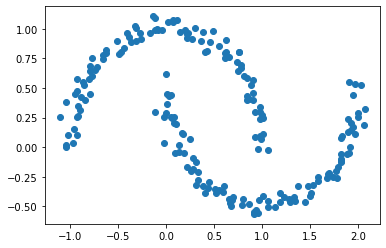

In [2]:
X,y=make_moons(n_samples=200, noise=0.05, random_state=42)

plt.scatter(X[:,0],X[:,1]) #X[:,0] =X축 좌표(X가 2차원이므로 이렇게 표현), X[:,1]=Y축 좌표
plt.show();

KMeans와 DBSCAN 비교

In [15]:
km=KMeans(n_clusters=2, random_state=42)
# km=km.fit(X)
# ykm=km.predict(X)
km_pred=km.fit_predict(X) #어차피 fit과 predict에 들어가는거 똑같으니까 한번에 쓰기

db=DBSCAN(eps=0.2,min_samples=5) #초기값 갖는 게 아니므로 random state 필요 없음; 모든 데이터에 대해 검사
db_pred=db.fit_predict(X)

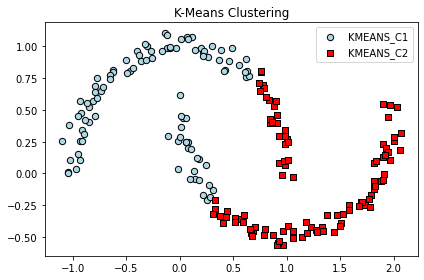

In [23]:
#kmeans 그림
#X축,y축: 넘파이 배열같이 iterable한 자료형 입력
plt.scatter(X[km_pred==0,0], X[km_pred==0,1], edgecolor='black', c='lightblue', marker='o',s=40, label='KMEANS_C1')
plt.scatter(X[km_pred==1,0], X[km_pred==1,1], edgecolor='black', c='red', marker='s',s=40, label='KMEANS_C2')
plt.legend()
plt.title("K-Means Clustering")
plt.tight_layout() #타이트하게 줄이는 것
plt.show();

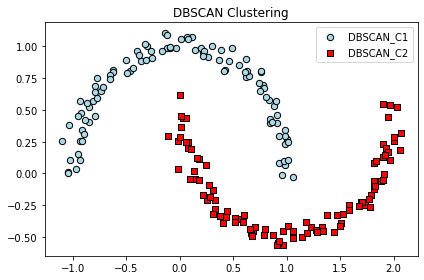

In [19]:
#DBSCAN 그림
plt.scatter(X[db_pred==0,0], X[db_pred==0,1], edgecolor='black', c='lightblue', marker='o',s=40, label='DBSCAN_C1')
plt.scatter(X[db_pred==1,0], X[db_pred==1,1], edgecolor='black', c='red', marker='s',s=40, label='DBSCAN_C2')
plt.legend()
plt.title("DBSCAN Clustering")
plt.tight_layout() #타이트하게 줄이는 것
plt.show();

In [22]:
X[km_pred==0,0]

array([-1.02069027e+00,  6.18421752e-01,  1.81424817e-01, -6.24088950e-01,
        1.42772056e-01, -4.67545663e-01, -8.05466315e-01, -1.36612342e-01,
       -9.29985486e-01, -4.88950223e-01,  3.07148004e-01, -9.29461328e-01,
       -4.35546022e-01, -3.64626935e-01, -8.50336581e-01, -5.06001155e-01,
        2.55143058e-01, -3.69270697e-02, -7.94054301e-01,  1.01441904e-02,
       -7.91566781e-01, -7.69764796e-01,  3.68433908e-01,  2.77577915e-01,
        6.50865785e-01, -8.44240641e-01,  1.63617528e-01,  1.40034780e-01,
       -7.67934237e-01, -1.04415256e+00, -9.67993105e-01, -9.29814902e-01,
        5.54677228e-01,  4.21841675e-01,  1.37732465e-01,  2.19046581e-01,
       -9.12223889e-01, -1.13923504e-01,  2.65501707e-01,  9.39993434e-02,
       -1.58565360e-02,  2.92544512e-03,  8.05561547e-02, -7.33686308e-01,
        1.59693508e-02, -8.80960181e-01,  4.59664536e-01, -3.09285667e-01,
        2.80903081e-02,  4.10616419e-01,  6.28701329e-01,  1.82768503e-01,
        6.22841350e-01,  

Mall_Customeres 예제(segmentation)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
df=pd.read_csv("Mall_Customers.csv",index_col=0)
df.head()
#ID는 개인정보 보호 위해 가림

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [27]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [28]:
#gender one-hot
df=pd.get_dummies(df,columns=['Gender'], drop_first=True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [29]:
#segmeatation_kmeans
km=KMeans(n_clusters=3)
km.fit(df) #fit하고 나면 예측결과가 km.labels_밑에 있음

KMeans(n_clusters=3)

In [30]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [31]:
#clustering 결과
result_df=df.copy()
result_df['label']=km.labels_ #라벨링된 데이터 만들기
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,0
3,20,16,6,0,0
4,23,16,77,0,0
5,31,17,40,0,0


In [33]:
#label별로 보고 싶으니까 groupby
result_df.groupby('label').mean()
#(인사이트 예시) 라벨1: 연봉 높은데 소비지수 낮음, so 라벨2 같이 소득&소비지수 높은 세그멘트에 집중해야 함

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.325203,44.154472,49.829268,0.406504
1,40.394737,87.000000,18.631579,0.526316
2,32.692308,86.538462,82.128205,0.461538


In [34]:
#각 라벨에 속하는 사람 수
result_df['label'].value_counts()

0    123
2     39
1     38
Name: label, dtype: int64

In [35]:
#잘 분류한 건지 k 검증_elbow
distance=[]

for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(df) #라벨 없는 걸 줘야 함
    distance.append(km.inertia_) #inertia: SSE 각 거리의 합

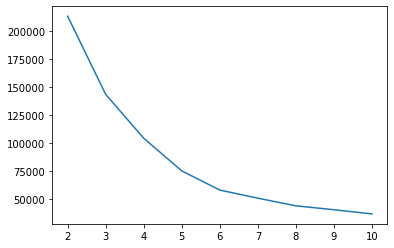

In [36]:
sns.lineplot(x=range(2,11), y=distance); #애매하므로 실루엣 필요

In [37]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score?
#모든 샘플의 평균 실루엣 상관계수; 클수록 분류 잘 되는 것

In [41]:
silhouette_coefs=[]

for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(df)
    silhouette_coefs.append(silhouette_score(df,km.labels_))

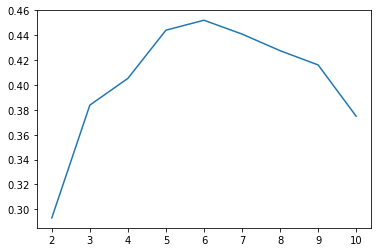

In [42]:
sns.lineplot(x=range(2,11),y=silhouette_coefs); #k값 6개로 바꾸는 게 better!

In [44]:
km=KMeans(n_clusters=6)
km.fit(df)
result_df=df.copy()
result_df['label']=km.labels_
result_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,5
3,20,16,6,0,1
4,23,16,77,0,5
5,31,17,40,0,1


In [45]:
result_df.groupby('label').mean()
#라벨5(젊은층): 소득 낮은데 소비성향 강함**
#라벨2: 소득과 소비성향 모두 높음
#내용은 같아도 카테고리 넘버는 다를 수 있음

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,56.155556,53.377778,49.088889,0.444444
1,44.142857,25.142857,19.523810,0.380952
2,32.692308,86.538462,82.128205,0.461538
3,27.000000,56.657895,49.131579,0.342105
4,41.685714,88.228571,17.285714,0.571429
5,25.272727,25.727273,79.363636,0.409091


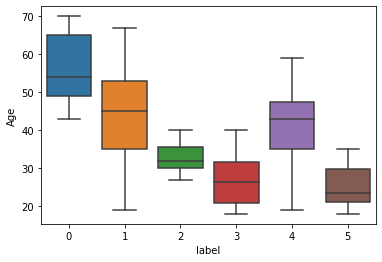

In [48]:
sns.boxplot(x='label',y='Age',data=result_df);
#카테고리마다 차이 볼 수 있음

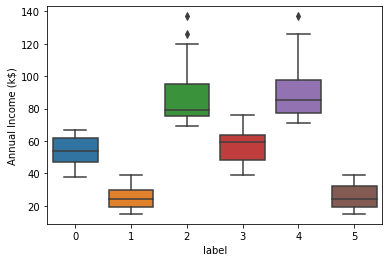

In [49]:
sns.boxplot(x='label',y='Annual Income (k$)',data=result_df);

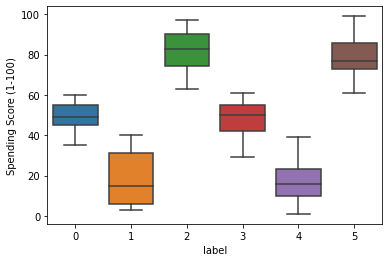

In [50]:
sns.boxplot(x='label',y='Spending Score (1-100)',data=result_df);